In [ ]:
pip install torch==1.8.0+cu111 torchtext==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 881.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.14.1
    Uninstalling torchtext-0.14.1:
      Successfully uninstalled torchtext-0.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.1+cu116 requires torch==1.13.1, but you have torch 1.8.0+cu111 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you hav

In [ ]:
import random
import numpy as np
import torch
from torchtext.legacy import data
from torchtext.legacy import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 设置随机数种子
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)

# 加载数据
TEXT = data.Field(tokenize='spacy', tokenizer_language='en_core_web_sm', include_lengths=True)
LABEL = data.LabelField(dtype=torch.float)

train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)
train_data, valid_data = train_data.split(random_state=random.seed(SEED))




In [ ]:
# 将数据集转换为Python列表，其中元素是由文本和标签组成的元组
train_data_list = [(example.text, example.label) for example in train_data.examples]
valid_data_list = [(example.text, example.label) for example in valid_data.examples]
test_data_list = [(example.text, example.label) for example in test_data.examples]


# 将文本数据连接为字符串
train_data_list = [(' '.join(text), label) for text, label in train_data_list]
valid_data_list = [(' '.join(text), label) for text, label in valid_data_list]
test_data_list = [(' '.join(text), label) for text, label in test_data_list]

# 提取特征和标签
X_train = [text for text, label in train_data_list]
y_train = [label for text, label in train_data_list]

X_valid = [text for text, label in valid_data_list]
y_valid = [label for text, label in valid_data_list]

X_test = [text for text, label in test_data_list]
y_test = [label for text, label in test_data_list]

# 向量化文本数据
vectorizer = CountVectorizer(stop_words='english', max_features=25_000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_valid_vectorized = vectorizer.transform(X_valid)
X_test_vectorized = vectorizer.transform(X_test)

# 训练朴素贝叶斯分类器
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

# 验证模型
valid_preds = clf.predict(X_valid_vectorized)
print("Validation Accuracy: {:.2f}".format(accuracy_score(y_valid, valid_preds)))

# 测试模型
test_preds = clf.predict(X_test_vectorized)
print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, test_preds)))

# 打印分类报告
print("\nClassification Report:")
print(classification_report(y_test, test_preds))

# 打印混淆矩阵
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_preds))


Validation Accuracy: 0.86
Test Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

         neg       0.79      0.88      0.83     12500
         pos       0.86      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000


Confusion Matrix:
[[10985  1515]
 [ 2918  9582]]


In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


Epoch: 01 | Epoch Time: 0m 0s
	Train Acc: 90.07%
	 Val. Acc: 85.68%
Epoch: 02 | Epoch Time: 0m 0s
	Train Acc: 90.07%
	 Val. Acc: 85.68%
Epoch: 03 | Epoch Time: 0m 0s
	Train Acc: 90.07%
	 Val. Acc: 85.68%
Epoch: 04 | Epoch Time: 0m 0s
	Train Acc: 90.07%
	 Val. Acc: 85.68%
Epoch: 05 | Epoch Time: 0m 0s
	Train Acc: 90.07%
	 Val. Acc: 85.68%


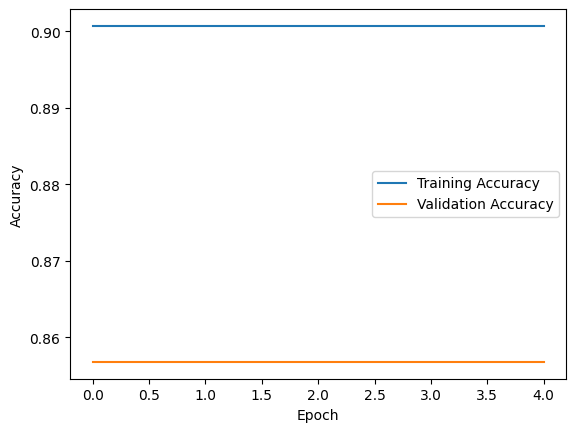

Accuracy: 82.27%
Precision: 86.35%
Recall: 76.66%
F1 Score: 81.21%
[[10985  1515]
 [ 2918  9582]]
[[0.8788  0.1212 ]
 [0.23344 0.76656]]


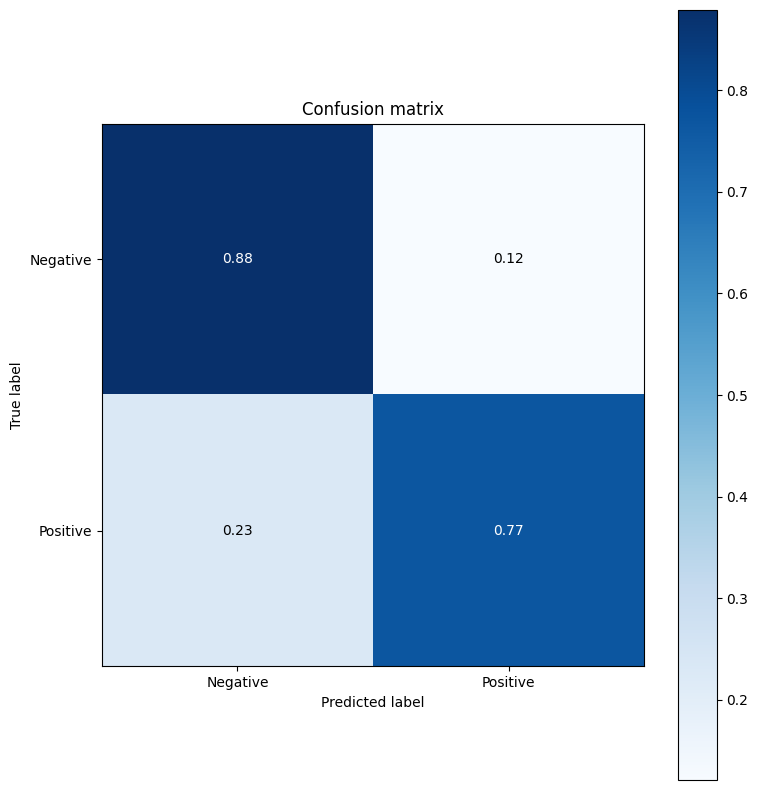

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import normalize


N_EPOCHS = 5
train_acc_history = []
valid_acc_history = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    clf = MultinomialNB()
    clf.fit(X_train_vectorized, y_train)

    train_acc = clf.score(X_train_vectorized, y_train)
    valid_acc = clf.score(X_valid_vectorized, y_valid)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Acc: {valid_acc*100:.2f}%')

    train_acc_history.append(train_acc)
    valid_acc_history.append(valid_acc)

# Plot accuracy history
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(valid_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_test_preds = clf.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_test_preds)
precision = precision_score(y_test, y_test_preds, pos_label='pos')
recall = recall_score(y_test, y_test_preds, pos_label='pos')
f1 = f1_score(y_test, y_test_preds, pos_label='pos')

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')

cm = confusion_matrix(y_test, y_test_preds)

print(cm)
cm_norm = normalize(cm, axis=1, norm='l1')
print(cm_norm)
labels = ['Negative', 'Positive']
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()


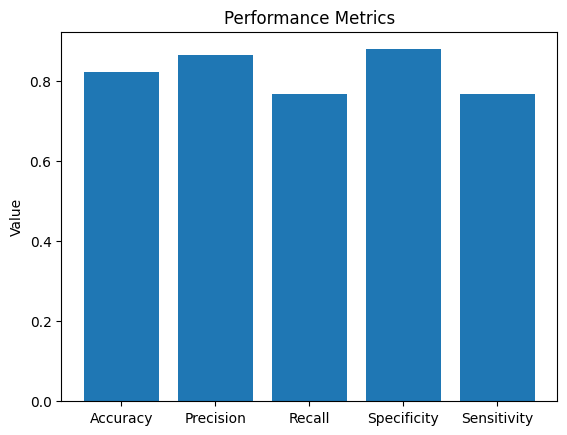

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the assessment indicators from confusion matrix
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
sensitivity = recall

# Putting indicators into arrays for plotting
ind = np.arange(5)
vals = [accuracy, precision, recall, specificity, sensitivity]
labels = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity']

# Plotting bar charts
plt.bar(ind, vals)
plt.xticks(ind, labels)
plt.ylabel('Value')
plt.title('Performance Metrics')
plt.show()
